In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl
from wordcloud import WordCloud
mpl.rcParams['font.sans-serif']=['SimHei']
import csv
import math
import seaborn as sns 

In [4]:
data = pd.read_csv('./data/vehicleSalesData.csv',encoding = 'gbk')

data.head()

C:\Users\86139\AppData\Local\Temp\ipykernel_12316\2150994966.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./data/vehicleSalesData.csv',encoding = 'gbk')


,省份,月份,市,县,年份,车架号,COMPANY,车系,车型,商用或个人,...,发动机参数1,发动机参数2燃油类型,发动机参数3,发动机参数1.1,发动机参数4,生产商,生产子COMPANY,车机生产编号,所属企业,车属分类
0,Shanxi Province,3,Shuozhou,shuoCity District,2013,LZW6450PF,"SAIC GM Wuling Automobile Co., Ltd",WuLing,Small passenger car,personal,...,79.0,gasoline,4490.0,1615.0,1900.0,NaN,NaN,NaN,"SAIC GM Wuling Automobile Co., Ltd",KK
1,Shanxi Province,3,jincheng,City District,2013,EQ6450PF1,"Dongfeng Xiaokang Automobile Co., Ltd",dongfeng,Small passenger car,personal,...,74.0,gasoline,4500.0,1680.0,1960.0,"Dongfeng Xiaokang Automobile Co., Ltd",NaN,EQ6440KMF,chongqin渝安淮海动力-COL-COMPANY,KK
2,Shanxi Province,12,changzhi,changzhiCity District,2013,BJ6440BKV1A,"BAIC Yinxiang Automobile Co., Ltd",beijing,Small passenger car,personal,...,75.0,gasoline,4440.0,NaN,NaN,"BAIC Yinxiang Automobile Co., Ltd",beijing,BJ6440BKV1A,"BAIC Yinxiang Automobile Co., Ltd",NaN
3,Shanxi Province,12,changzhi,changzhiCity District,2013,DXK6440AF2F,"Dongfeng Xiaokang Automobile Co., Ltd",dongfeng,Small passenger car,personal,...,85.0,gasoline,4365.0,1720.0,1770.0,"Dongfeng Xiaokang Automobile Co., Ltd",dongfeng,DXK6440AF2F,chongqin小康动力-COL-COMPANY,多用途乘用车
4,Shanxi Province,12,changzhi,changzhiCity District,2013,DXK6440AFF,"Dongfeng Xiaokang Automobile Co., Ltd",dongfeng,Small passenger car,personal,...,70.5,gasoline,4365.0,1720.0,1770.0,"Dongfeng Xiaokang Automobile Co., Ltd",dongfeng,DXK6440AFF,chongqin小康动力-COL-COMPANY,多用途乘用车


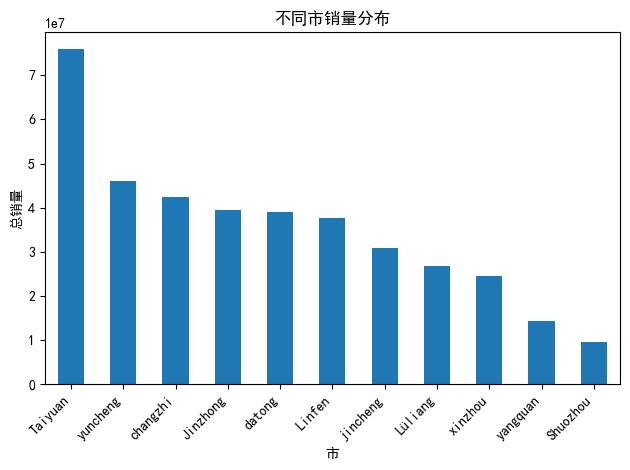

In [12]:
#不同省份的销量情况
df=data
province_sales = df.groupby('市')['销量'].sum().sort_values(ascending=False)  
province_sales.plot(kind='bar')  
plt.title('不同市销量分布')  
plt.xlabel('市')  
plt.ylabel('总销量')  
plt.xticks(rotation=45, ha="right")  
plt.tight_layout()  
plt.show()

In [6]:
data['发动机参数2燃油类型'] = data['发动机参数2燃油类型'].fillna('Unknown')  # 填充未知类型  
  
# 计算每个省份、市、县的每种燃油类型的销量总和  
fuel_type_sales = data.groupby(['省份', '市', '县', '发动机参数2燃油类型'])['销量'].sum().reset_index()  
  
# 计算每个省份、市、县的总销量  
total_sales_by_region = data.groupby(['省份', '市', '县'])['销量'].sum().reset_index()  
  
# 合并数据以计算每种燃油类型的比例  
fuel_type_proportions = pd.merge(fuel_type_sales, total_sales_by_region, on=['省份', '市', '县'], suffixes=('_fuel', '_total'))  
fuel_type_proportions['比例'] = fuel_type_proportions['销量_fuel'] / fuel_type_proportions['销量_total'] * 100  
  
# 显示结果  
print(fuel_type_proportions[['省份', '市', '县', '发动机参数2燃油类型', '比例']])  
  
# 如果您只对特定省份或所有省份的汇总感兴趣，可以进一步筛选或汇总数据  
# 例如，查看所有省份的燃油类型比例汇总（忽略市和县）  
province_fuel_proportions = fuel_type_proportions.groupby(['省份', '发动机参数2燃油类型'])['比例'].sum().reset_index()  
print(province_fuel_proportions)

                  省份         市         县   发动机参数2燃油类型         比例
0    Shanxi Province  Jinzhong  CITYZONE     gasoline  99.623620
1    Shanxi Province  Jinzhong  CITYZONE  natural gas   0.376380
2    Shanxi Province  Jinzhong  Jinzhong      Unknown   0.469759
3    Shanxi Province  Jinzhong  Jinzhong   diesel oil   4.748820
4    Shanxi Province  Jinzhong  Jinzhong     gasoline  86.631588
..               ...       ...       ...          ...        ...
596  Shanxi Province  yuncheng   绛county      Unknown   0.357460
597  Shanxi Province  yuncheng   绛county   diesel oil   7.240114
598  Shanxi Province  yuncheng   绛county     gasoline  88.772134
599  Shanxi Province  yuncheng   绛county  natural gas   3.021535
600  Shanxi Province  yuncheng   绛county            电   0.608756

[601 rows x 5 columns]
                 省份            发动机参数2燃油类型            比例
0   Shanxi Province                    NG     27.506121
1   Shanxi Province               Unknown    138.683949
2   Shanxi Province         

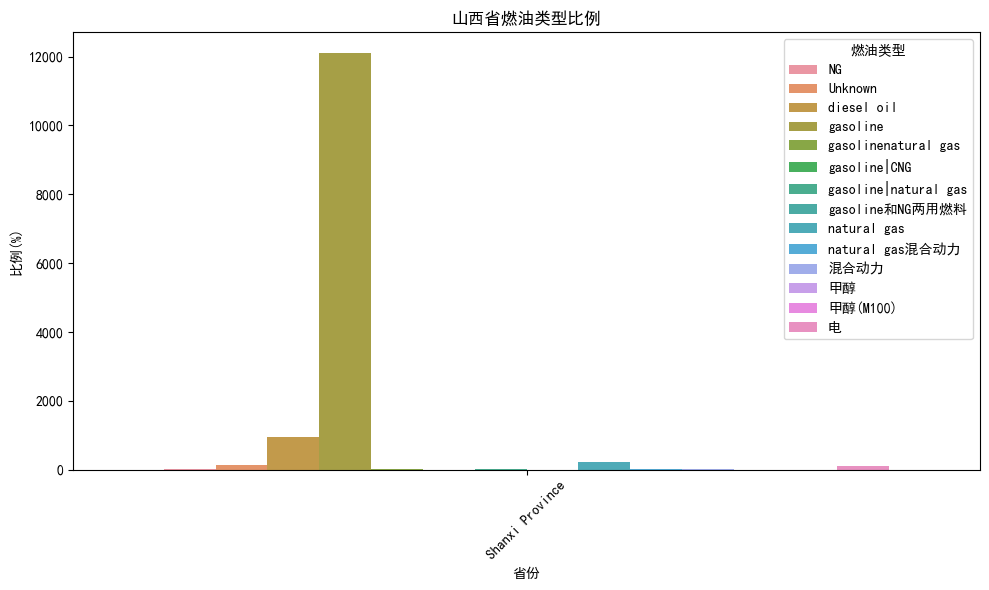

In [7]:
plt.figure(figsize=(10, 6))  # 设置图形大小  
sns.barplot(x='省份', y='比例', hue='发动机参数2燃油类型', data=province_fuel_proportions)  
plt.title('山西省燃油类型比例')  # 设置图形标题  
plt.xlabel('省份')  # 设置x轴标签  
plt.ylabel('比例(%)')  # 设置y轴标签  
plt.legend(title='燃油类型')  # 设置图例标题  
plt.xticks(rotation=45)  # 旋转x轴标签，以便更好地显示  
plt.tight_layout()  # 自动调整子图参数, 使之填充整个图像区域  
plt.show()

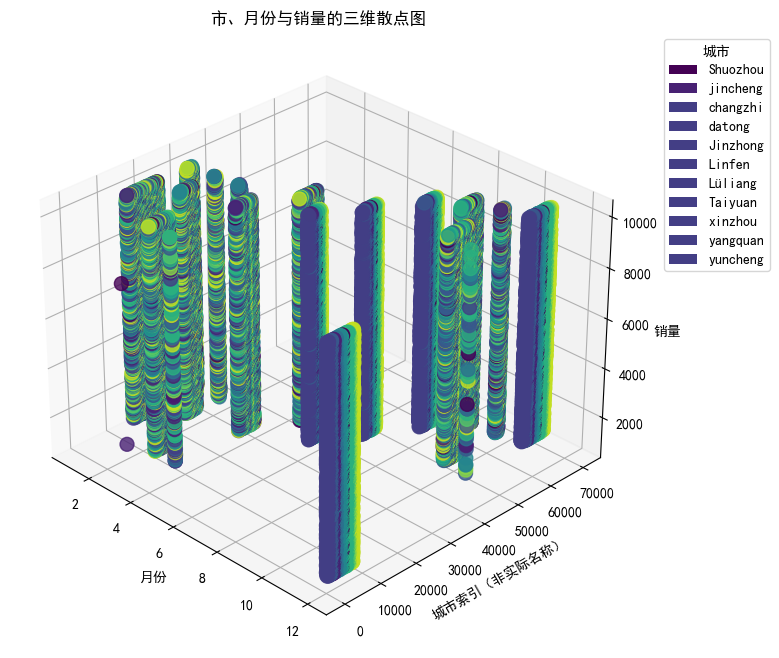

In [9]:
city_colors = plt.cm.viridis(pd.factorize(df['市'])[0] / len(df['市'].unique()))  
  
# 创建图形和三维轴  
fig = plt.figure(figsize=(10, 8))  # 增加图形尺寸  
ax = fig.add_subplot(111, projection='3d')  
  
# 绘制三维散点图，使用颜色区分城市，并调整标记大小和透明度  
ax.scatter(df['月份'], range(len(df)), df['销量'], c=city_colors, s=100, alpha=0.8, marker='o')  
  
# 由于城市名称不适合直接用作Y轴（它们是离散的），我们可以使用索引  
# 但为了清晰起见，我们不在Y轴上显示城市名称，而是使用图例或注释  
  
# 添加图例（需要为每种颜色创建一个代理）  
proxies = [plt.Rectangle((0, 0), 1, 1, fc=c) for c in city_colors]  
ax.legend(proxies, df['市'].unique(), loc='upper left', bbox_to_anchor=(1.05, 1), title='城市')  
  
# 设置轴标签  
ax.set_xlabel('月份')  
ax.set_ylabel('城市索引（非实际名称）')  
ax.set_zlabel('销量')  
  
# 设置图形标题  
ax.set_title('市、月份与销量的三维散点图')  
  
# 调整视角（可选）  
ax.view_init(elev=30, azim=-45)  
  
# 显示图形  
plt.show()  

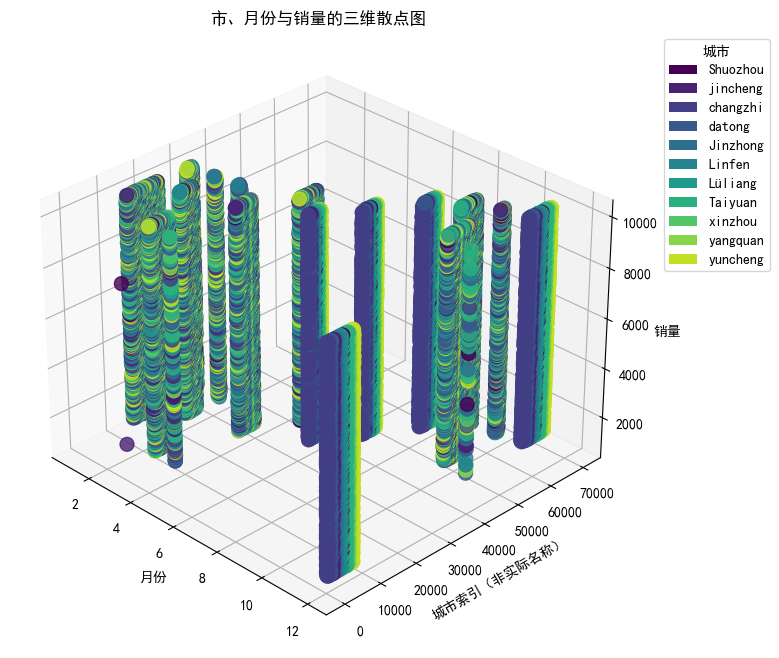

In [10]:
import pandas as pd  
import matplotlib.pyplot as plt  
df=data
# 假设 df 是已经加载好的 DataFrame  
# df['市'] 包含城市名称，df['月份'] 包含月份，df['销量'] 包含销量  
  
# 使用 factorize 获取城市的唯一编码  
city_codes, unique_cities = pd.factorize(df['市'])  
  
# 生成颜色映射，确保颜色在整个 viridis 颜色图中均匀分布  
city_colors = plt.cm.viridis(city_codes / len(unique_cities))  
  
# 创建图形和三维轴  
fig = plt.figure(figsize=(10, 8))  
ax = fig.add_subplot(111, projection='3d')  
  
# 绘制三维散点图  
ax.scatter(df['月份'], range(len(df)), df['销量'], c=city_colors, s=100, alpha=0.8, marker='o')  
  
# 添加图例  
proxies = [plt.Rectangle((0, 0), 1, 1, fc=plt.cm.viridis(i / len(unique_cities))) for i in range(len(unique_cities))]  
ax.legend(proxies, unique_cities, loc='upper left', bbox_to_anchor=(1.05, 1), title='城市')  
  
# 设置轴标签和标题  
ax.set_xlabel('月份')  
ax.set_ylabel('城市索引（非实际名称）')  
ax.set_zlabel('销量')  
ax.set_title('市、月份与销量的三维散点图')  
  
# 调整视角  
ax.view_init(elev=30, azim=-45)  
  
# 显示图形  
plt.show()

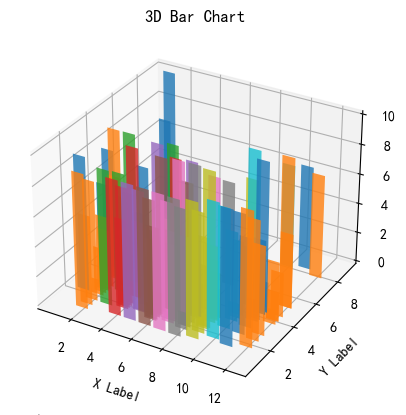

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df=ses2

# 创建三维图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制三维柱状图
for col in df.columns:
    xs = [col] * len(df.index)
    ys = df.index
    zs = df[col].values
    ax.bar(xs, ys, zs, zdir='y', alpha=0.8)

# 设置标签和标题
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.set_title('3D Bar Chart')

plt.show()

C:\Users\86139\AppData\Local\Temp\ipykernel_2120\3173691732.py:7: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(r"./data/vehicleSalesData.csv",encoding='gbk')# 假设 data 是包含月份、市区和销量的数据集


     月份         市       销量
0     1  Jinzhong  5625273
1     1    Linfen  6826969
2     1   Lüliang  3640860
3     1  Shuozhou  1225778
4     1   Taiyuan  8715212
..   ..       ...      ...
127  12    datong  4225334
128  12  jincheng  3581197
129  12   xinzhou  2147525
130  12  yangquan  1600606
131  12  yuncheng  4976556

[132 rows x 3 columns]


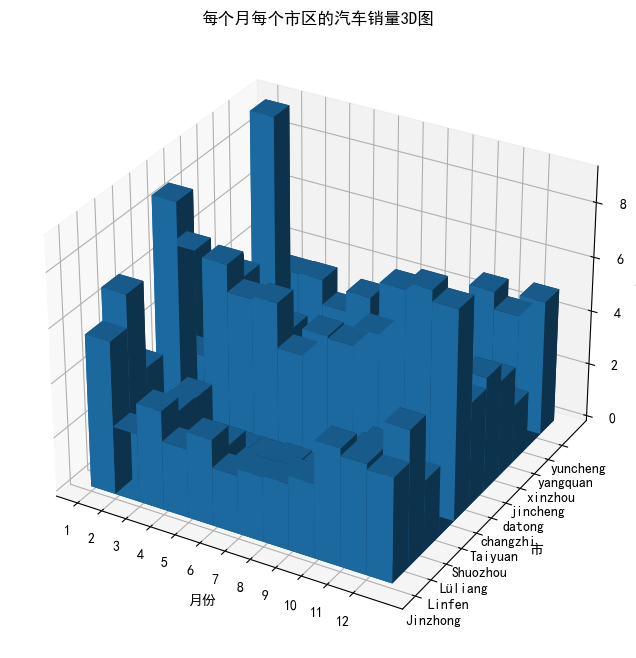

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import numpy as np
data=pd.read_csv(r"./data/vehicleSalesData.csv",encoding='gbk')# 假设 data 是包含月份、市区和销量的数据集

# 筛选出需要分析的数据
data_filtered = data[['月份', '市', '销量']]

# 按照月份和市区进行分组，并计算每个分组的销量总和
data_grouped = data_filtered.groupby(['月份', '市']).sum().reset_index()
print(data_grouped)

# 创建3D图形
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 获取月份和市区的唯一值
months = data_grouped['月份'].unique()
cities = data_grouped['市'].unique()

# 创建月份和市区的网格
months_grid, cities_grid = np.meshgrid(np.arange(len(months)), np.arange(len(cities)), indexing='ij')

# 初始化销量网格
sales_grid = np.zeros((len(months), len(cities)))

# 填充销量网格
for _, row in data_grouped.iterrows():
    month = row['月份']
    city = row['市']
    sales = row['销量']
    month_idx = np.where(months == month)[0][0]
    city_idx = np.where(cities == city)[0][0]
    sales_grid[month_idx, city_idx] = sales

# 绘制3D柱状图
ax.bar3d(months_grid.ravel(), cities_grid.ravel(), np.zeros_like(sales_grid).ravel(),
         1, 1, sales_grid.ravel(), shade=True)

# 设置轴标签
ax.set_xlabel('月份')
ax.set_ylabel('市')
ax.set_zlabel('销量')

# 设置轴刻度
ax.set_xticks(np.arange(len(months)))
ax.set_xticklabels(months)
ax.set_yticks(np.arange(len(cities)))
ax.set_yticklabels(cities)

plt.title('每个月每个市区的汽车销量3D图')
plt.show()


C:\Users\86139\AppData\Local\Temp\ipykernel_2120\205419905.py:6: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./data/vehicleSalesData.csv',encoding='gbk')


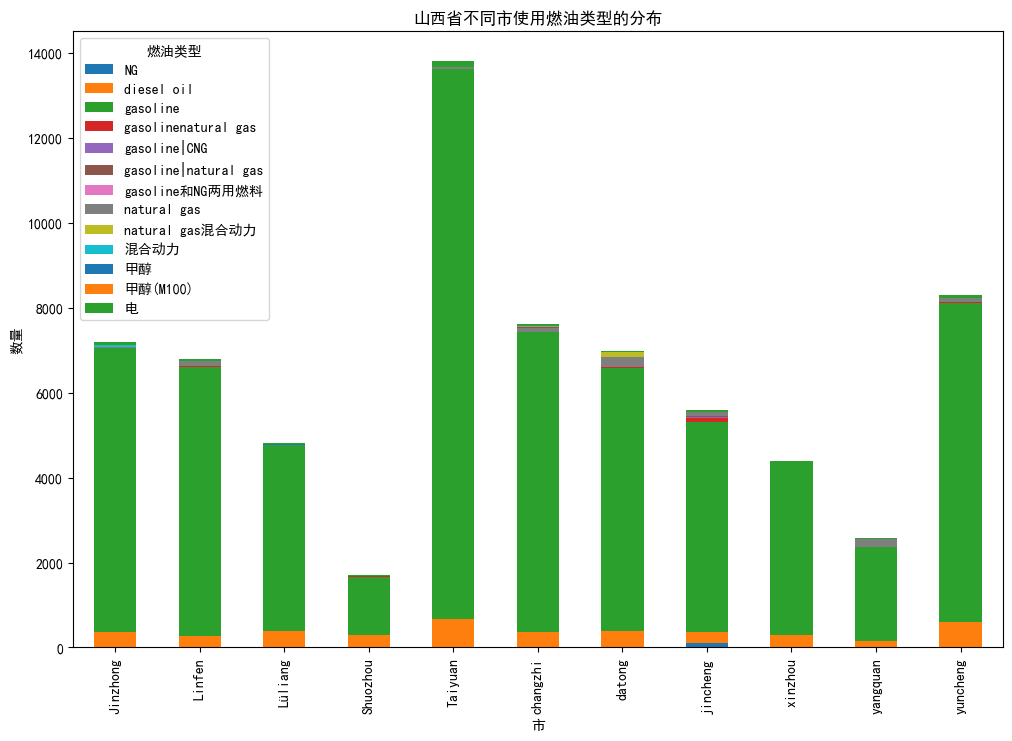

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
# 读取CSV文件
data = pd.read_csv('./data/vehicleSalesData.csv',encoding='gbk')


# 筛选出山西省的数据
shanxi_data = data[data['省份'] == 'Shanxi Province']

# 统计不同市使用燃油类型的数量
fuel_type_by_city = shanxi_data.groupby(['市', '发动机参数2燃油类型']).size().unstack(fill_value=0)

# 绘制柱状图
fuel_type_by_city.plot(kind='bar', figsize=(12, 8), stacked=True)
plt.title('山西省不同市使用燃油类型的分布')
plt.xlabel('市')
plt.ylabel('数量')
plt.legend(title='燃油类型')
plt.show()


C:\Users\86139\AppData\Local\Temp\ipykernel_2120\1038916334.py:7: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./data/vehicleSalesData.csv', encoding='gbk')


<Figure size 2000x600 with 0 Axes>

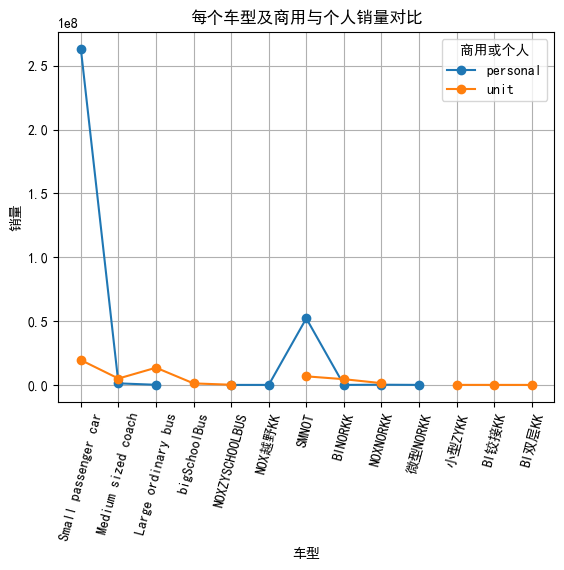

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams["font.sans-serif"] = ["SimHei"]
mpl.rcParams["axes.unicode_minus"] = False

data = pd.read_csv('./data/vehicleSalesData.csv', encoding='gbk')

data.dropna(subset=['车型', '商用或个人', '销量'], inplace=True)

sales_data = data[['车型', '商用或个人', '销量']]

grouped_data = sales_data.groupby(['车型', '商用或个人']).sum().unstack()
grouped_data = grouped_data['销量']  

grouped_data = grouped_data.reindex(data['车型'].unique())

plt.figure(figsize=(20, 6))
grouped_data.plot(kind='line', marker='o', title='每个车型及商用与个人销量对比', xlabel='车型', ylabel='销量')
plt.legend(title='商用或个人', loc='upper right')
plt.xticks(range(len(grouped_data.index)), labels=grouped_data.index, rotation=75)  
plt.grid(True)
plt.show()

In [5]:
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt  
  
# 读取数据  
vehicle_sales_data = pd.read_csv(r'./data/vehicleSalesData.csv', encoding='gbk')  
  

city_map = {  
    'Taiyuan': '太原',  
    'yuncheng': '运城',  
    'changzhi': '长治',  
    'Jinzhong': '晋中',  
    'datong': '大同',  
    'Linfen': '临汾',  
    'jincheng': '晋城',  
    'Lüliang': '吕梁',  
    'xinzhou': '忻州',  
    'yangquan': '阳泉',  
    'Shuozhou': '朔州'  
}  
  
# 将城市名称转换为中文  
vehicle_sales_data['市'] = vehicle_sales_data['市'].map(city_map)  
  
# 数据聚合  
sales_pivot = vehicle_sales_data.pivot_table(index='市', columns='车型', values='销量', aggfunc='sum', fill_value=0)  
  
# 绘制热力图  
plt.figure(figsize=(12, 8))    
sns.heatmap(sales_pivot, annot=True, cmap='YlGnBu', fmt=".0f")  
plt.title('山西省各市不同车型销量热力图') 
plt.xlabel('车型')  
plt.ylabel('市')  
  
plt.show()

SyntaxError: invalid non-printable character U+00A0 (1978892450.py, line 1)

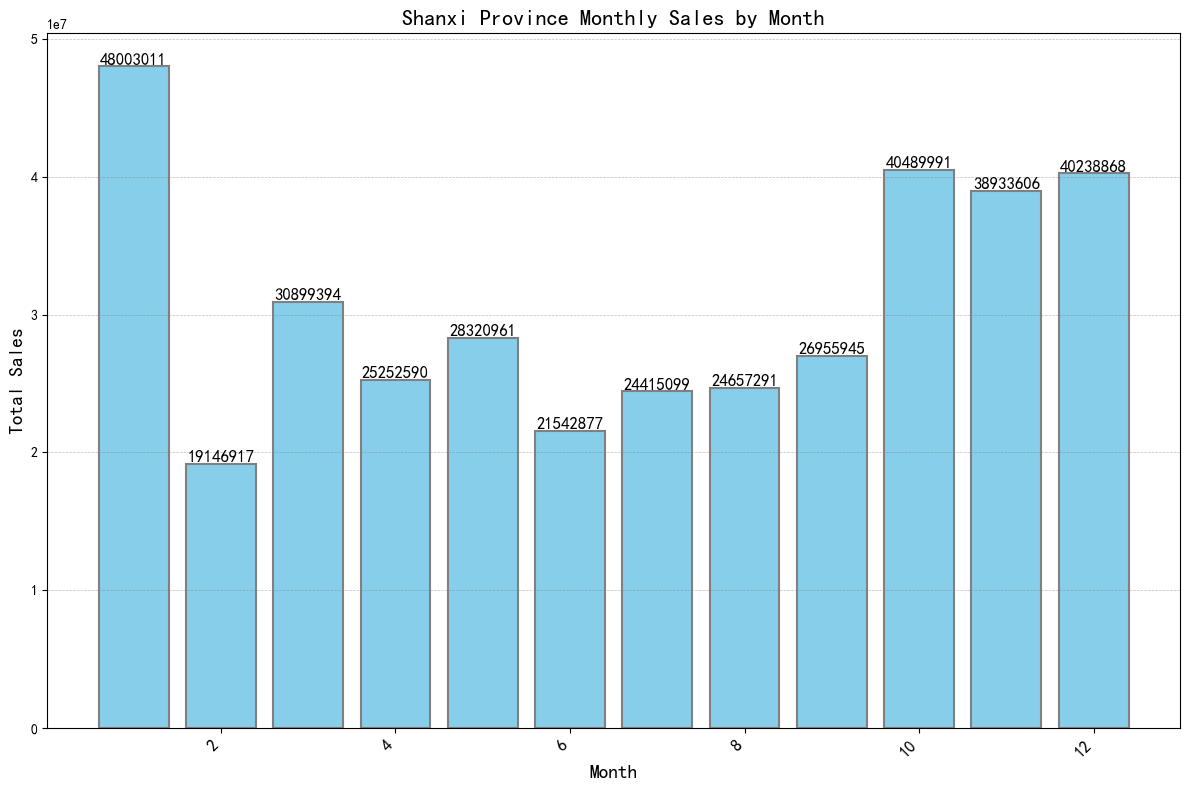

In [6]:
import matplotlib.pyplot as plt  
import pandas as pd  


df=data
# 假设df已经正确加载了数据  
shanxi_data = df[df['省份'] == 'Shanxi Province']   
monthly_sales = shanxi_data.groupby('月份')['销量'].sum().reset_index()  
  
# 创建图形  
plt.figure(figsize=(12, 8))  # 稍微调整图形大小  
  
# 绘制条形图  
bars = plt.bar(monthly_sales['月份'], monthly_sales['销量'], color='skyblue', edgecolor='grey', linewidth=1.5)  # 添加边框  
  
# 添加标题和轴标签  
plt.title('Shanxi Province Monthly Sales by Month', fontsize=16, fontweight='bold')  
plt.xlabel('Month', fontsize=14)  
plt.ylabel('Total Sales', fontsize=14)  
  
# 旋转x轴标签  
plt.xticks(rotation=45, ha="right", fontsize=12)  # ha="right" 确保标签不会与条形重叠  
  
# 添加网格线  
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='grey', alpha=0.5)  
  
# 自定义条形图上的数据标签  
for bar in bars:  
    height = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width()/2.0, height, str(height), ha='center', va='bottom', fontsize=12, color='black')  
  
# 调整布局以适应标签  
plt.tight_layout()  
  
# 显示图形  
plt.show()